# **Crawling berita**

## 1.Install package dan requirements  
> jika pada pc anda belum terinstall package *requests* maka melakukan langkah awal installasi *requests* yang bertujuan untuk mengirim permintaan HTTP ke server.

In [ ]:
# requirements
!pip install requests
import requests
from bs4 import BeautifulSoup
import csv
import random

## 2.Set url yang dibutuhkan  
> Berikut merupakan link situs web berita yang saya gunakan yaitu antaranews

In [ ]:
url = "https://www.antaranews.com/" #menentukan url

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser') #Isi teks dari respons HTTP yang diterima dari server web setelah melakukan permintaan GET.
# pages = soup.findAll('article', {'class' :'list-content__item'})
first_page = soup.findAll('li',"dropdown mega-full menu-color1") #menemukan semua list yang berisi link kategori

# print(first_page)
save_categori = []
for links in first_page:
  categori = links.find('a').get('href')
  save_categori.append(categori)
save_categori

['https://www.antaranews.com/',
 'https://www.antaranews.com/politik',
 'https://www.antaranews.com/hukum',
 'https://www.antaranews.com/ekonomi',
 'https://www.antaranews.com/metro',
 'https://www.antaranews.com/sepakbola',
 'https://www.antaranews.com/olahraga',
 'https://www.antaranews.com/humaniora',
 'https://www.antaranews.com/lifestyle',
 'https://www.antaranews.com/hiburan',
 'https://www.antaranews.com/dunia',
 'https://en.antaranews.com']

## 3.Pilih kategori link  
> Setting kategori yang akan digunakan, saya mengambil 3 kategori yaitu politik, ekonomi, dan olahraga

In [ ]:
categori_search = [save_categori[1],save_categori[3],save_categori[6]] #categori yang akan disearch terdapat pada indeks 1,3,6
categori_search

['https://www.antaranews.com/politik',
 'https://www.antaranews.com/ekonomi',
 'https://www.antaranews.com/olahraga']

## 4.Proses Crawling  
> **Crawling** merupakan alat otomatis yang mengumpulkan beragam informasi dengan menjelajahi berbagai halaman web. Proses ini mencakup identifikasi serta ekstraksi elemen-elemen seperti teks, gambar, dan unsur lainnya, sehingga membentuk pemahaman menyeluruh tentang konten yang tersebar di internet.

In [ ]:
datas=[]

# ==== perulangan pages berita =====
for ipages in range(1,17):
  # if ipages < 17:
  #   random_speed = round(random.uniform(0, 3), 2)
  #   output_str = 'Sedang Crawling Data : ' + '*' * ipages + '.' * (16 - ipages) + ' (' + str(random_speed)+'Kbps/'+ str(ipages * 6.25) + '%)'
  #   print(output_str)

  # ==== mengambil link setiap list berita ===
  for beritas in categori_search:
    # print(beritas)
    response_berita = requests.get(beritas+"/"+str(ipages))
    namecategori = beritas.split("/")
    # print("==============================================================================")
    # print(f"... Mengambil data berita kategori - {namecategori[-1]}, Pages ke-{ipages}")
    # print("==============================================================================")
    # print(beritas+"/"+str(ipages))

    soup_berita = BeautifulSoup(response_berita.text, 'html.parser')
    pages_berita = soup_berita.findAll('article', {'class' :'simple-post simple-big clearfix'})

    # print(pages_berita)
    i = 0
    for items in pages_berita:
      i += 1
      # print(f'...Data ke-{i}')
      get_link_in = items.find("a").get("href")
      # print("link :",get_link_in)

      # ======== masuk ke link pages ==========
      response_artikel = requests.get(get_link_in)
      soup_artikel = BeautifulSoup(response_artikel.text, 'html.parser')

      # # print(soup_artikel)
      # content = soup_artikel.findAll("div","content_news")
      # print(content)

      # =========== judul =========
      cek_judul = soup_artikel.findAll("h1","post-title")
      if cek_judul:
        judul = soup_artikel.find("h1","post-title").text
      else:
        judul=""
      # print("judul :",judul)

      # =========== label ==========
      label = namecategori[-1]
      # print("label :",label)

      # ========== date ========
      try:
        date = soup_artikel.find("span", "article-date").text
      except AttributeError:
          date = "Data tanggal tidak ditemukan"

      # print("date :",date)

      # ========== baca juga =======
      cek_baca_juga = soup_artikel.findAll("span","baca-juga")
      trash1 = ""
      if cek_baca_juga:
        for bacas in cek_baca_juga:
          text_trash = bacas.text
          trash1 += text_trash + ' '
      else:
        trash1 = ""
      # print(trash1)

      # ======== artikel ========
      artikels = soup_artikel.find_all('div', {'class' :'post-content clearfix'})
      if artikels:
        artikel_content = soup_artikel.find('div', {'class' :'post-content clearfix'}).text
        artikel = artikel_content.replace("\n"," ").replace("\t"," ").replace("\r"," ").replace(trash1,"").replace("\xa0","")
      else:
        artikel = ""
      # print("isi artikel",artikel)

      # ========= author ======
      cek_author = soup_artikel.findAll("p","text-muted small mt10")
      if cek_author:
        author = soup_artikel.find("p","text-muted small mt10").text.replace("\t\t"," ")
      else:
        author = ""
      # print("author :",author)
      # print("\n==================================================================")
      datas.append({
      'Tanggal' : date,
      'Penulis':author,
      'Judul': judul,
      'Artikel': artikel,
      'Label' :  label
          })
  # if ipages == 16:
  #   output_str = 'Sedang Crawling Data : ' + '*' * ipages + '.' * (16 - ipages) + ' (' + str(random_speed)+'Kbps/'+ str(ipages * 6.25) + '%)'
  #   print(output_str)
  #   print(f'Data berhasil dicrawling sebanyak : {len(datas)}')


In [ ]:
for ipages in range(1,17):
  if ipages < 16:
    random_speed = round(random.uniform(0, 3), 2)
    output_str = 'Sedang Crawling Data : ' + '*' * ipages + '.' * (16 - ipages) + ' (' + str(random_speed)+'Kbps/'+ str(ipages * 6.25) + '%)'
    print(output_str)
  else:
    output_str = 'Sedang Crawling Data : ' + '*' * ipages + '.' * (16 - ipages) + ' (' + str(random_speed)+'Kbps/'+ str(ipages * 6.25) + '%)'
    print(output_str)
    print(f'Data berhasil dicrawling sebanyak : {len(datas)}')

Sedang Crawling Data : *............... (1.37Kbps/6.25%)
Sedang Crawling Data : **.............. (1.99Kbps/12.5%)
Sedang Crawling Data : ***............. (1.97Kbps/18.75%)
Sedang Crawling Data : ****............ (0.2Kbps/25.0%)
Sedang Crawling Data : *****........... (2.85Kbps/31.25%)
Sedang Crawling Data : ******.......... (1.69Kbps/37.5%)
Sedang Crawling Data : *******......... (0.39Kbps/43.75%)
Sedang Crawling Data : ********........ (0.46Kbps/50.0%)
Sedang Crawling Data : *********....... (0.26Kbps/56.25%)
Sedang Crawling Data : **********...... (2.42Kbps/62.5%)
Sedang Crawling Data : ***********..... (0.45Kbps/68.75%)
Sedang Crawling Data : ************.... (1.91Kbps/75.0%)
Sedang Crawling Data : *************... (2.62Kbps/81.25%)
Sedang Crawling Data : **************.. (2.44Kbps/87.5%)
Sedang Crawling Data : ***************. (0.1Kbps/93.75%)
Sedang Crawling Data : **************** (0.1Kbps/100.0%)
Data berhasil dicrawling sebanyak : 720


In [ ]:
len(datas)

720

## 5.Save data  
> Menyimpan data hasil crawling dalam format csv

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'data_crawling_berita_antaranews.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Tanggal', 'Penulis', 'Judul', 'Artikel', 'Label']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datas:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_crawling_berita_antaranews.csv


# Preprocessing  
> Data Preprocessing merupakan salah satu tahapan dalam melakukan mining data. Sebelum menuju ke tahap  pemprosesan. Data mentah akan diolah terlebih dahulu. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai. Selain itu dalam proses ini data akan diubah dalam bentuk yang akan lebih dipahami oleh sistem.

## 1.Install package

In [ ]:
import os
import pandas as pd
import numpy as np
import gdown
import string

## 2.Download dan baca data

In [ ]:
name = 'data_crawling_berita_antaranews.csv'
gdown.download(f'https://drive.google.com/uc?id=1iuY-raVaRjcwV63Ua8fIGa9dC01yvPvQ', name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iuY-raVaRjcwV63Ua8fIGa9dC01yvPvQ
To: /content/data_crawling_berita_antaranews.csv
100%|██████████| 1.88M/1.88M [00:00<00:00, 184MB/s]


'data_crawling_berita_antaranews.csv'

In [ ]:
data = pd.read_csv("data_crawling_berita_antaranews.csv")
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
2,"Senin, 30 Oktober 2023 00:11 WIB",NaN,Din Syamsuddin ajak warga Muhammadiyah tak apa...,ANTARA - Tokoh Muhammadiy...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
...,...,...,...,...,...
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga
718,"Senin, 23 Oktober 2023 15:11 WIB",NaN,"Lepas kontingen futsal putra U-18, Babel optim...",ANTARA - Pemerintah Provinsi Kepulauan Bangka ...,olahraga


### Banyak raw data

In [ ]:
count_ekonomi = 0
count_olahraga= 0
count_politik = 0

for value in data['Label']:
  if value == 'ekonomi':
    count_ekonomi+=1
  elif value == 'olahraga':
    count_olahraga+=1
  else:
    count_politik += 1

print(
f'''
Banyak data ekonomi = {count_ekonomi} data
Banyak data olahraga= {count_olahraga} data
Banyak data politik = {count_politik} data

Total Data          = {len(data)} data
'''
)


Banyak data ekonomi = 240 data
Banyak data olahraga= 240 data
Banyak data politik = 240 data

Total Data          = 720 data



## 3.Cleaning data  
> merupakan serangkaian langkah untuk membersihkan, menyiapkan, dan mempersiapkan teks atau data teks untuk analisis atau pemodelan lebih lanjut

### Missing Value  
> merupakan nilai pada sebuah data yang kosong/none sehingga harus dihapus untuk proses lebih lanjut

In [ ]:
data.isna().sum()

Tanggal     0
Penulis    81
Judul       4
Artikel    38
Label       0
dtype: int64

### Hapus missing value

In [ ]:
data = data.dropna()
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik
...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga


### Duplicate

In [ ]:
data.duplicated().sum()

2

### Hapus data duplicate  
> Duplikasi data merujuk pada keadaan di mana ada satu atau lebih salinan dari entri data yang sama atau serupa dalam sebuah dataset. Hal ini berarti terdapat baris atau entri dalam dataset yang memiliki nilai yang identik atau sangat mirip dengan baris lainnya dalam dataset yang sama.

In [ ]:
data = data.drop_duplicates()
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik
...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga


### Banyak data olah

In [ ]:
count_ekonomi = 0
count_olahraga= 0
count_politik = 0

for value in data['Label']:
  if value == 'ekonomi':
    count_ekonomi+=1
  elif value == 'olahraga':
    count_olahraga+=1
  else:
    count_politik += 1

print(
f'''
Banyak data ekonomi = {count_ekonomi} data
Banyak data olahraga= {count_olahraga} data
Banyak data politik = {count_politik} data

Total Data          = {len(data)} data
'''
)


Banyak data ekonomi = 224 data
Banyak data olahraga= 209 data
Banyak data politik = 204 data

Total Data          = 637 data



In [ ]:
len(data)

637

### Clean regex

In [ ]:
import re
data['clean_artikel'] = data['Artikel'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()

<ipython-input-39-2963b7f8861d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_artikel'] = data['Artikel'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()


In [ ]:
data

,Tanggal,Penulis,Judul,Artikel,Label,clean_artikel
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik,jakarta antara politikus pdi perjuangan ...
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik,jakarta antara lima berita politik pada ...
3,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik,jakarta antara sekretaris jenderal pks h...
4,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik,jakarta antara sekretaris jenderal sekje...
5,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik,jakarta antara wakil ketua majelis permu...
...,...,...,...,...,...,...
714,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga,"hangzhou, china antara atlet para atleti..."
715,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga,medan antara atlet para atletik asal sum...
716,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga,"xiaoshan, china antara asisten pelatih t..."
717,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga,"hangzhou, china antara pelari saptoyogo ..."


### Tokenizing  

> **Tokenizing** adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token. Disini menggunakan term kalimat

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data["tokenizing"] = data['clean_artikel'].apply(sent_tokenize)

<ipython-input-42-054db4156dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tokenizing"] = data['clean_artikel'].apply(sent_tokenize)


In [ ]:
len(data['tokenizing'])

637

In [ ]:
data.reset_index(drop=True, inplace=True) #atur indeks data mulai dari 0 lagi

In [ ]:
# for i in range(len(data['tokenizing'][249])):
#   print(f'======= kalimat ke- {i+1}')
#   print(data['tokenizing'][249][i])

In [ ]:
data

,Tanggal,Penulis,Judul,Artikel,Label,clean_artikel,tokenizing
0,"Senin, 30 Oktober 2023 08:33 WIB",Pewarta: Rivan Awal LinggaEditor: Sigit Pinard...,Masinton Pasaribu harap pemeriksaan 9 hakim ko...,Jakarta (ANTARA) - Politikus PDI Perjuang...,politik,jakarta antara politikus pdi perjuangan ...,[ jakarta antara politikus pdi perjuangan...
1,"Senin, 30 Oktober 2023 05:28 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,"Politik kemarin, Kaesang effect hingga target ...",Jakarta (ANTARA) - Lima berita politik pa...,politik,jakarta antara lima berita politik pada ...,[ jakarta antara lima berita politik pada...
2,"Minggu, 29 Oktober 2023 23:31 WIB",Pewarta: Rina Nur AnggrainiEditor: Imam Budila...,PKS heran hasil survei AMIN selalu buruk,Jakarta (ANTARA) - Sekretaris Jenderal PK...,politik,jakarta antara sekretaris jenderal pks h...,[ jakarta antara sekretaris jenderal pks ...
3,"Minggu, 29 Oktober 2023 23:20 WIB",Pewarta: Rivan Awal LinggaEditor: Imam Budilak...,Sekjen PKS targetkan tiga perempat warga NU du...,Jakarta (ANTARA) - Sekretaris Jenderal (S...,politik,jakarta antara sekretaris jenderal sekje...,[ jakarta antara sekretaris jenderal sekj...
4,"Minggu, 29 Oktober 2023 22:45 WIB",Pewarta: Hendri Sukma IndrawanEditor: Didik Ku...,Wakil Ketua MPR: Pilpres adalah kontestasi put...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik,jakarta antara wakil ketua majelis permu...,[ jakarta antara wakil ketua majelis perm...
...,...,...,...,...,...,...,...
632,"Senin, 23 Oktober 2023 15:49 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Suparni sebut medali perak di Hangzhou pertaja...,"Hangzhou, China (ANTARA) - Atlet Para atl...",olahraga,"hangzhou, china antara atlet para atleti...","[ hangzhou, china antara atlet para atlet..."
633,"Senin, 23 Oktober 2023 15:40 WIB",Pewarta: JuraidiEditor: Eka Arifa Rusqiyati C...,Riadi bangga sebagai pembawa bendera di pembuk...,Medan (ANTARA) - Atlet Para atletik asal ...,olahraga,medan antara atlet para atletik asal sum...,[ medan antara atlet para atletik asal su...
634,"Senin, 23 Oktober 2023 15:30 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Pelatih pastikan kondisi atlet powerlifting pr...,"Xiaoshan, China (ANTARA) - Asisten pelati...",olahraga,"xiaoshan, china antara asisten pelatih t...","[ xiaoshan, china antara asisten pelatih ..."
635,"Senin, 23 Oktober 2023 15:23 WIB",Pewarta: Arnidhya Nur ZhafiraEditor: Eka Arifa...,Saptoyogo raih medali emas pertama untuk Indon...,"Hangzhou, China (ANTARA) - Pelari Saptoyo...",olahraga,"hangzhou, china antara pelari saptoyogo ...","[ hangzhou, china antara pelari saptoyogo..."


## 4.TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer


In [ ]:
tfidf_results = []
set_len_doc = data['tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results



In [ ]:
# coba0 = tfidf_results[0].toarray()
# for i in coba0:
#   print(list(i))

In [ ]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# tfidf_results

## 5.Cosine Simmilarity  
> merupakan metode untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Biasanya, cosine similarity digunakan dalam pemrosesan bahasa alami dan pengelompokan dokumen untuk menentukan seberapa serupa atau berbeda dua dokumen berdasarkan representasi vektor mereka.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [ ]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [ ]:
# cos_sim_result[0]

In [ ]:
# menampilkan hasil cosine simmilarity

for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 2 : 6 = 0.08679964953717964
Cosine Similarity Kalimat 2 : 7 = 0.1601692405610604
Cosine Similarity Kalimat 2 : 9 = 0.10717659445466195
Cosine Similarity Kalimat 2 : 12 = 0.1519007269718839
Cosine Similarity Kalimat 2 : 15 = 0.1350914619811363
Cosine Similarity Kalimat 3 : 7 = 0.1237213038260998
Cosine Similarity Kalimat 3 : 9 = 0.14984212573427205
Cosine Similarity Kalimat 3 : 12 = 0.13989630072198145
Cosine Similarity Kalimat 3 : 14 = 0.0814556765544127
Cosine Similarity Kalimat 5 : 6 = 0.2687010785681935
Cosine Similarity Kalimat 5 : 8 = 0.1078038348587205
Cosine Similarity Kalimat 5 : 13 = 0.16144067551988095
Cosine Similarity Kalimat 6 : 8 = 0.08385262632123805
Cosine Similarity Kalimat 6 : 11 = 0.14850507266361815
Cosine Similarity Kalimat 6 : 14 = 0.09668455232581377
Cosine Similarity Kalimat 6 : 17 = 0.11006536695152098
Cosine Similarity Kalimat 6 : 20 = 0.09562585365505673
Cosine Similarity Kalimat 7 :

In [ ]:
# cosine = cosine_similarity(tfidf_results[0])
# cosine[:]

In [ ]:
# G = nx.DiGraph()
# for i in range(len(cosine)):
#     for j in range(len(cosine)):
#         similarity = cosine[i][j]
#         if similarity > 0.08 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
#             G.add_edge(i, j, weight = similarity)

## 6.Closenes Centrality  
> salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.

In [ ]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 1: 0.1111111111111111,
 3: 0.1111111111111111,
 4: 0.3333333333333333,
 7: 0.6666666666666666,
 8: 0.6049382716049383,
 2: 0.14814814814814814,
 6: 0.25,
 5: 0.2962962962962963,
 9: 0.5470085470085471}

In [ ]:
# clos_cen = nx.closeness_centrality(graf_result[8])
# len(clos_cen)

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')


Streaming output truncated to the last 5000 lines.


========= document ke-366 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.03225806451612903
Closenes Centrality Node 2 = 0.06451612903225806
Closenes Centrality Node 3 = 0.06451612903225806
Closenes Centrality Node 4 = 0.03225806451612903
Closenes Centrality Node 5 = 0.16129032258064516
Closenes Centrality Node 7 = 0.12903225806451613
Closenes Centrality Node 9 = 0.07258064516129031
Closenes Centrality Node 11 = 0.26129032258064516
Closenes Centrality Node 17 = 0.06451612903225806
Closenes Centrality Node 22 = 0.35288367546432065
Closenes Centrality Node 29 = 0.5620071684587814
Closenes Centrality Node 30 = 0.4521505376344086
Closenes Centrality Node 31 = 0.5692599620493359
Closenes Centrality Node 10 = 0.04301075268817204
Closenes Centrality Node 13 = 0.20543293718166386
Closenes Centrality Node 14 = 0.26021505376344084
Closenes Centrality Node 15 = 0.29032258064516125
Closenes Centrality Node 24 = 0.

#### Menampilkan(visualisasi) contoh graf

menampilkan graf hanya 3 dokumen sebagai sample

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 3 = 0.1111111111111111
Closenes Centrality Node 4 = 0.3333333333333333
Closenes Centrality Node 7 = 0.6666666666666666
Closenes Centrality Node 8 = 0.6049382716049383
Closenes Centrality Node 2 = 0.14814814814814814
Closenes Centrality Node 6 = 0.25
Closenes Centrality Node 5 = 0.2962962962962963
Closenes Centrality Node 9 = 0.5470085470085471


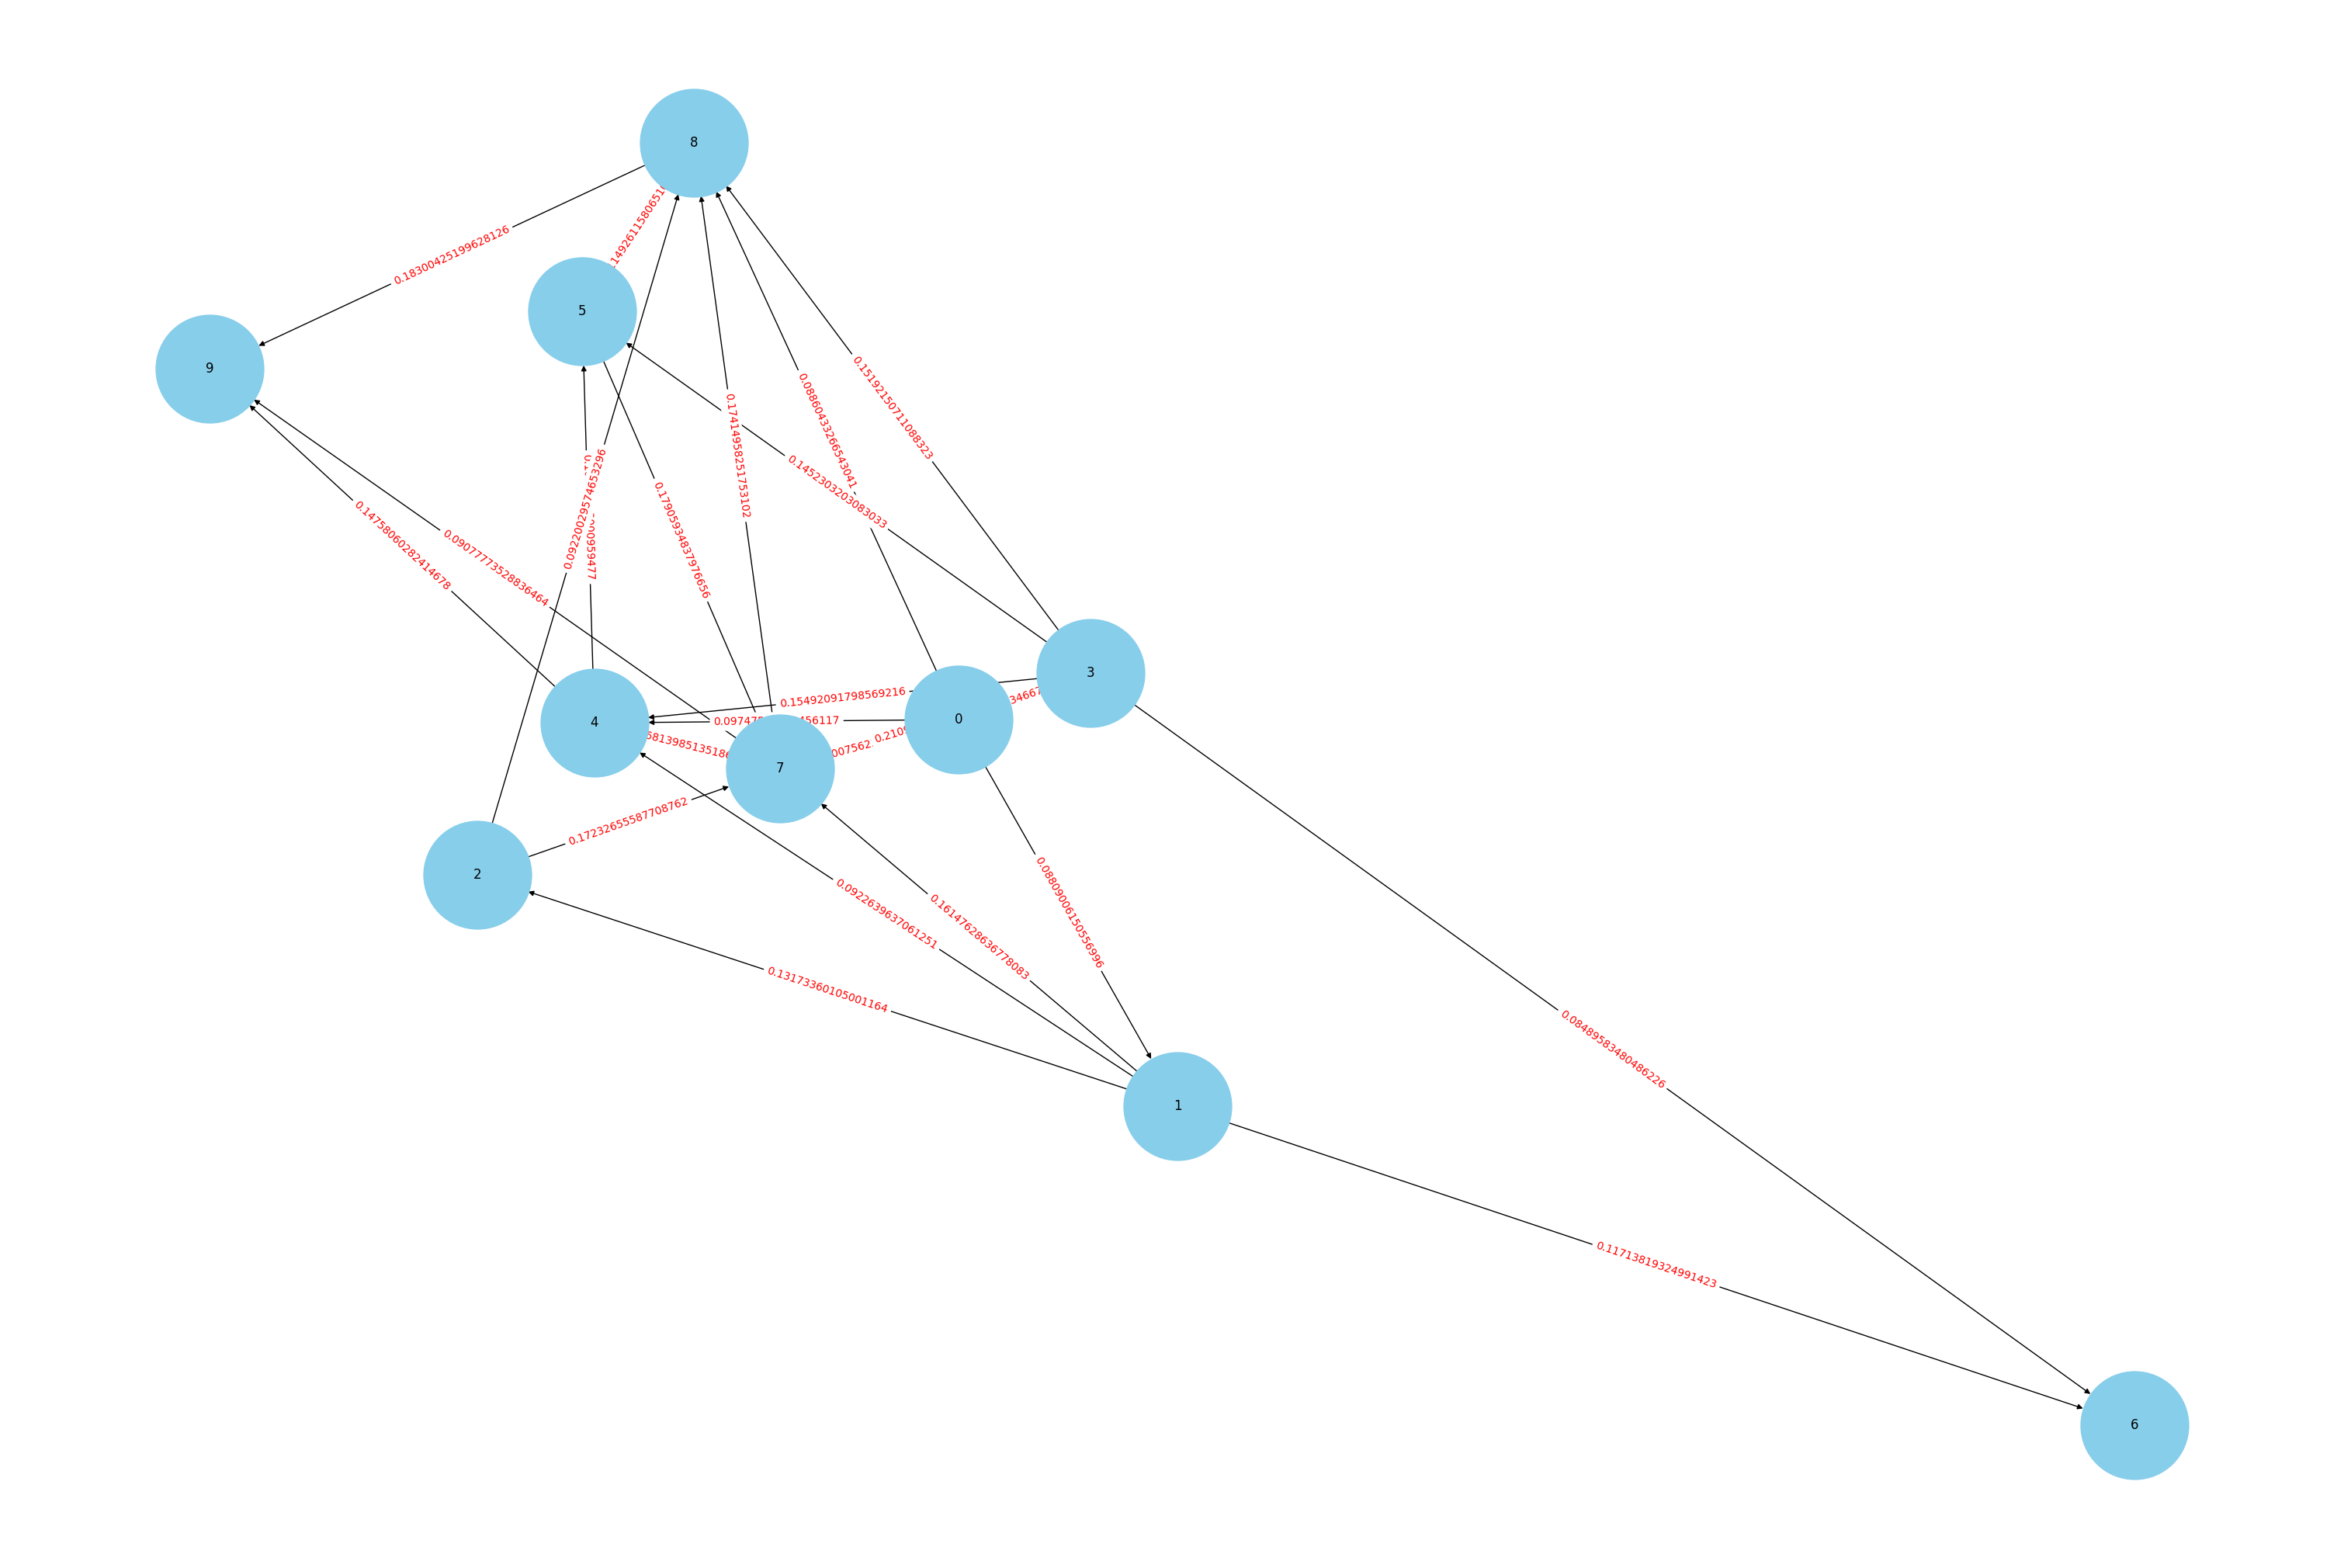



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.09090909090909091
Closenes Centrality Node 2 = 0.18181818181818182
Closenes Centrality Node 3 = 0.20454545454545453
Closenes Centrality Node 5 = 0.20661157024793386
Closenes Centrality Node 7 = 0.29090909090909095
Closenes Centrality Node 8 = 0.4049586776859504
Closenes Centrality Node 11 = 0.5289256198347108
Closenes Centrality Node 4 = 0.18181818181818182
Closenes Centrality Node 6 = 0.1925133689839572
Closenes Centrality Node 10 = 0.43315508021390375
Closenes Centrality Node 9 = 0.0


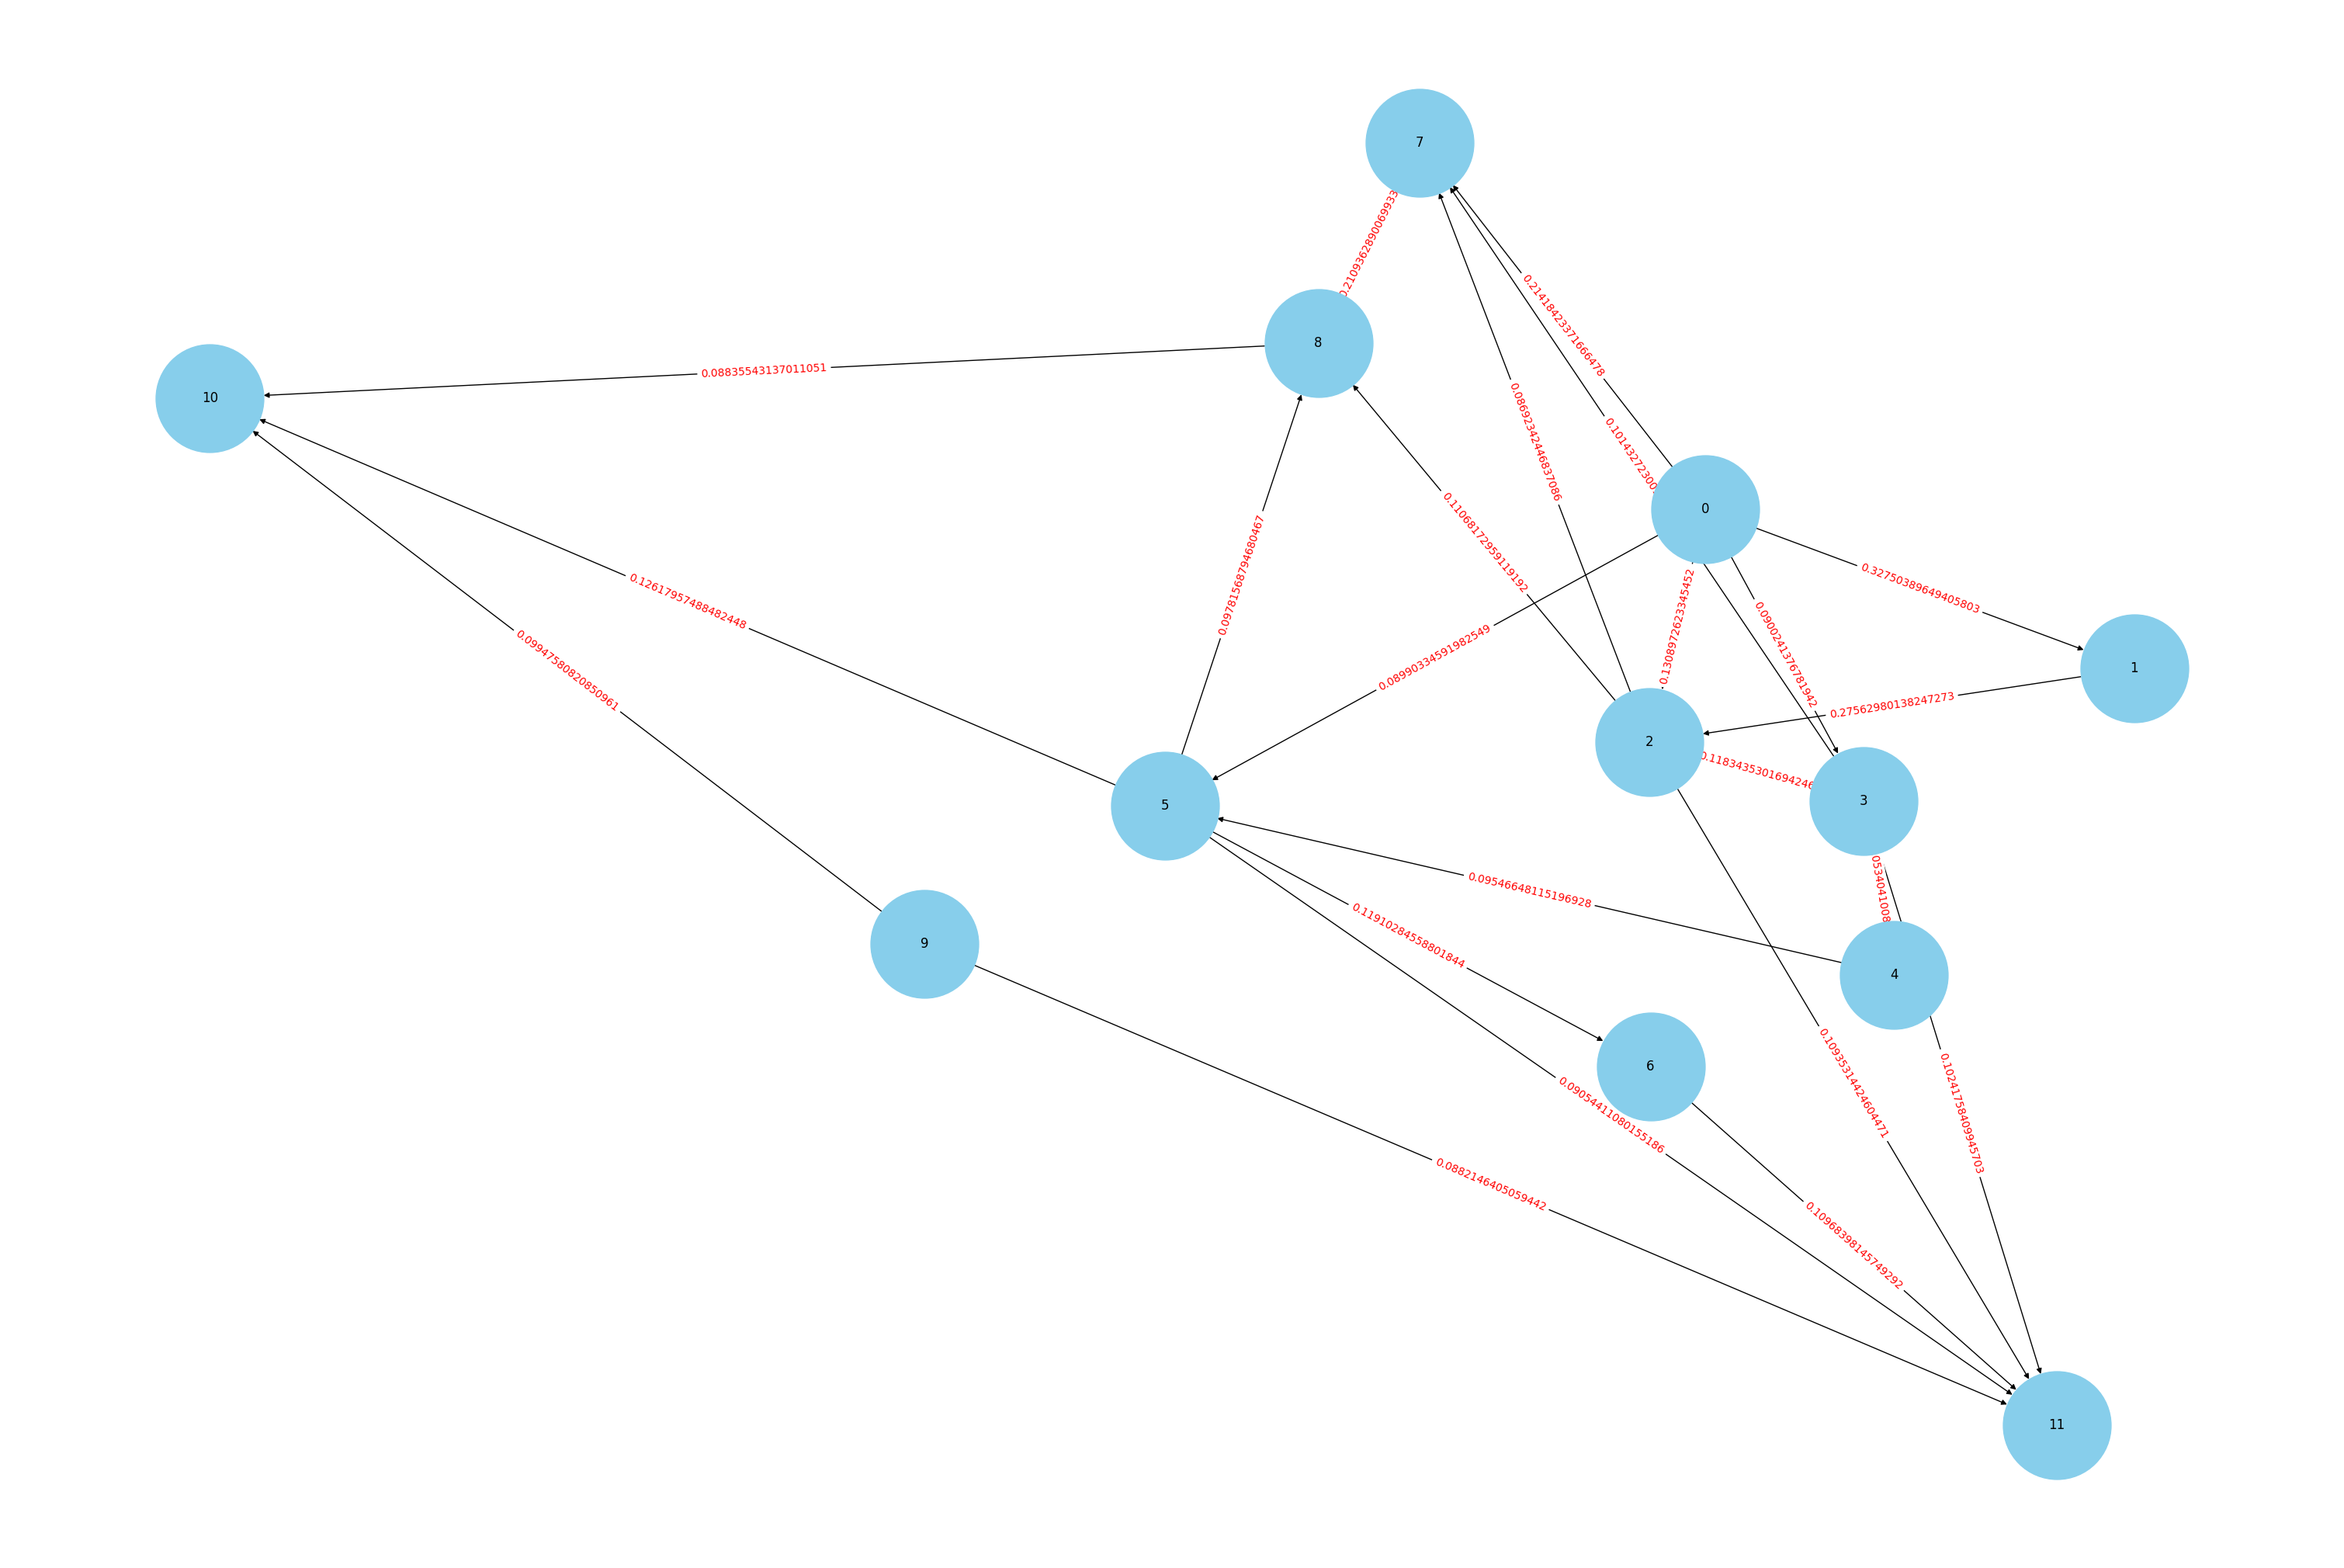



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.0625
Closenes Centrality Node 2 = 0.0625
Closenes Centrality Node 7 = 0.2
Closenes Centrality Node 8 = 0.1953125
Closenes Centrality Node 9 = 0.22499999999999998
Closenes Centrality Node 11 = 0.2784090909090909
Closenes Centrality Node 16 = 0.3980263157894737
Closenes Centrality Node 6 = 0.1736111111111111
Closenes Centrality Node 3 = 0.08333333333333333
Closenes Centrality Node 4 = 0.08333333333333333
Closenes Centrality Node 5 = 0.09375
Closenes Centrality Node 13 = 0.3333333333333333
Closenes Centrality Node 12 = 0.25
Closenes Centrality Node 10 = 0.1801470588235294
Closenes Centrality Node 14 = 0.0
Closenes Centrality Node 15 = 0.0625


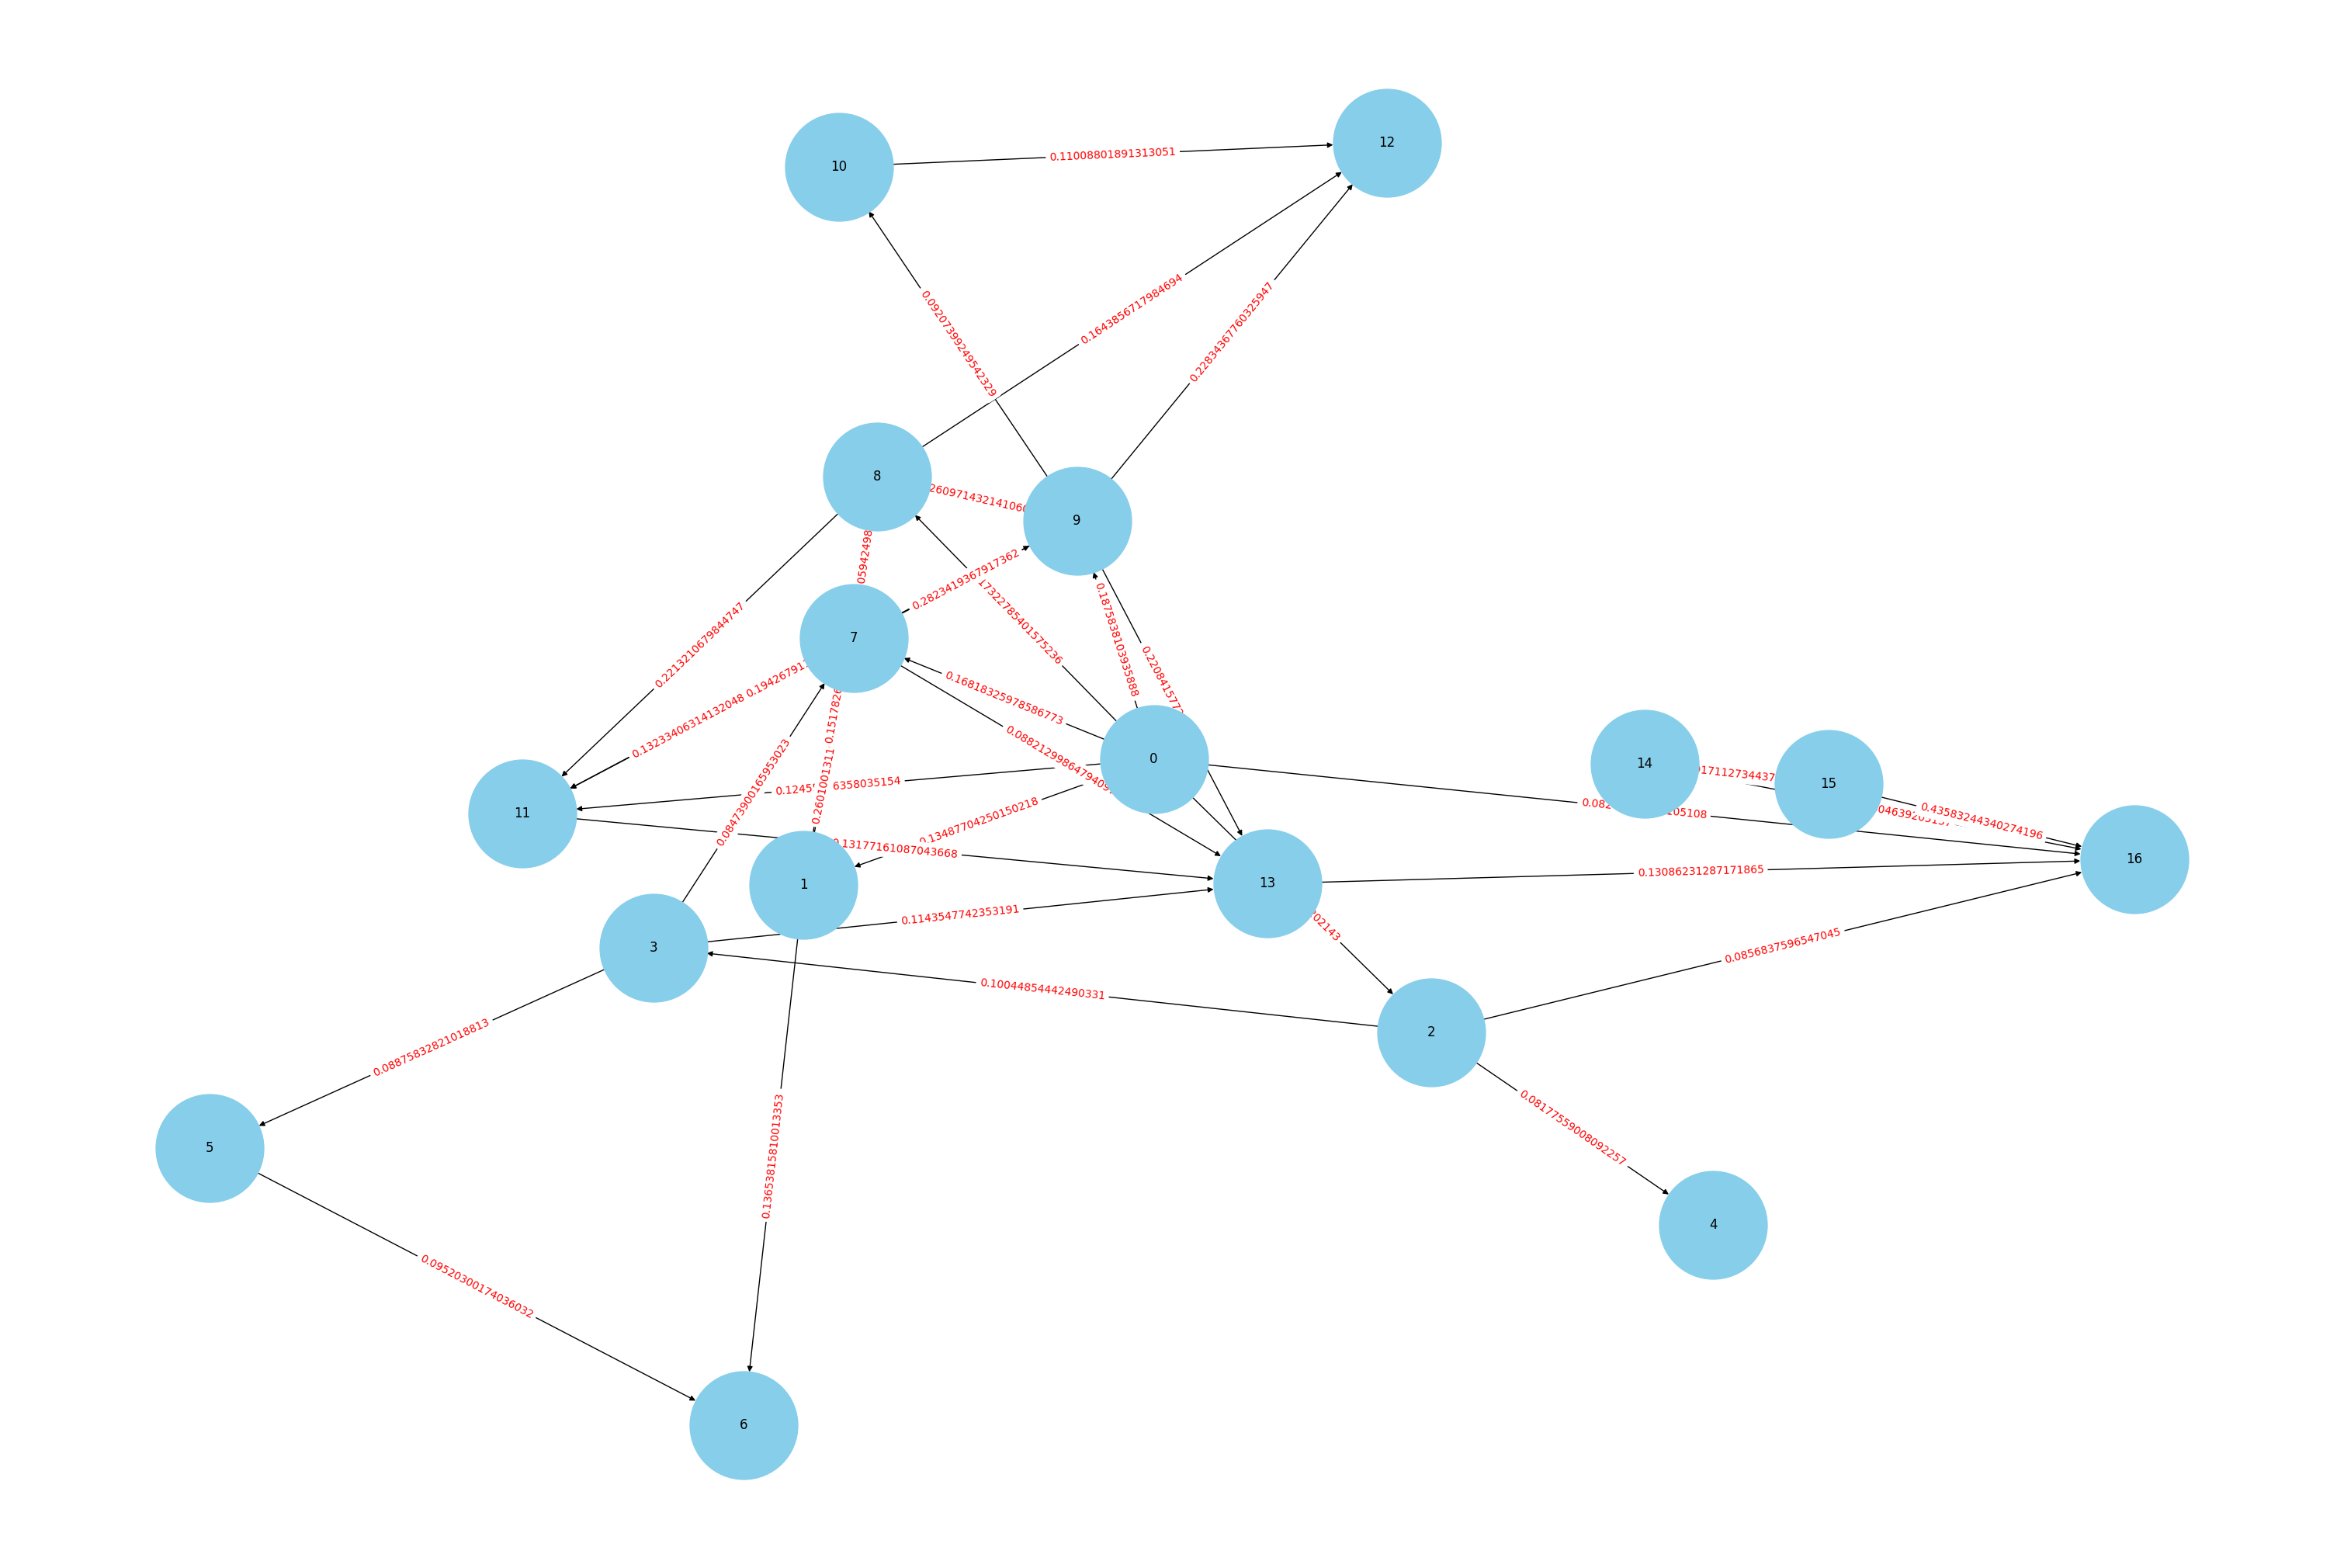



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.125
Closenes Centrality Node 2 = 0.25
Closenes Centrality Node 6 = 0.28125
Closenes Centrality Node 7 = 0.375
Closenes Centrality Node 9 = 0.8
Closenes Centrality Node 5 = 0.4
Closenes Centrality Node 4 = 0.22499999999999998
Closenes Centrality Node 8 = 0.2857142857142857


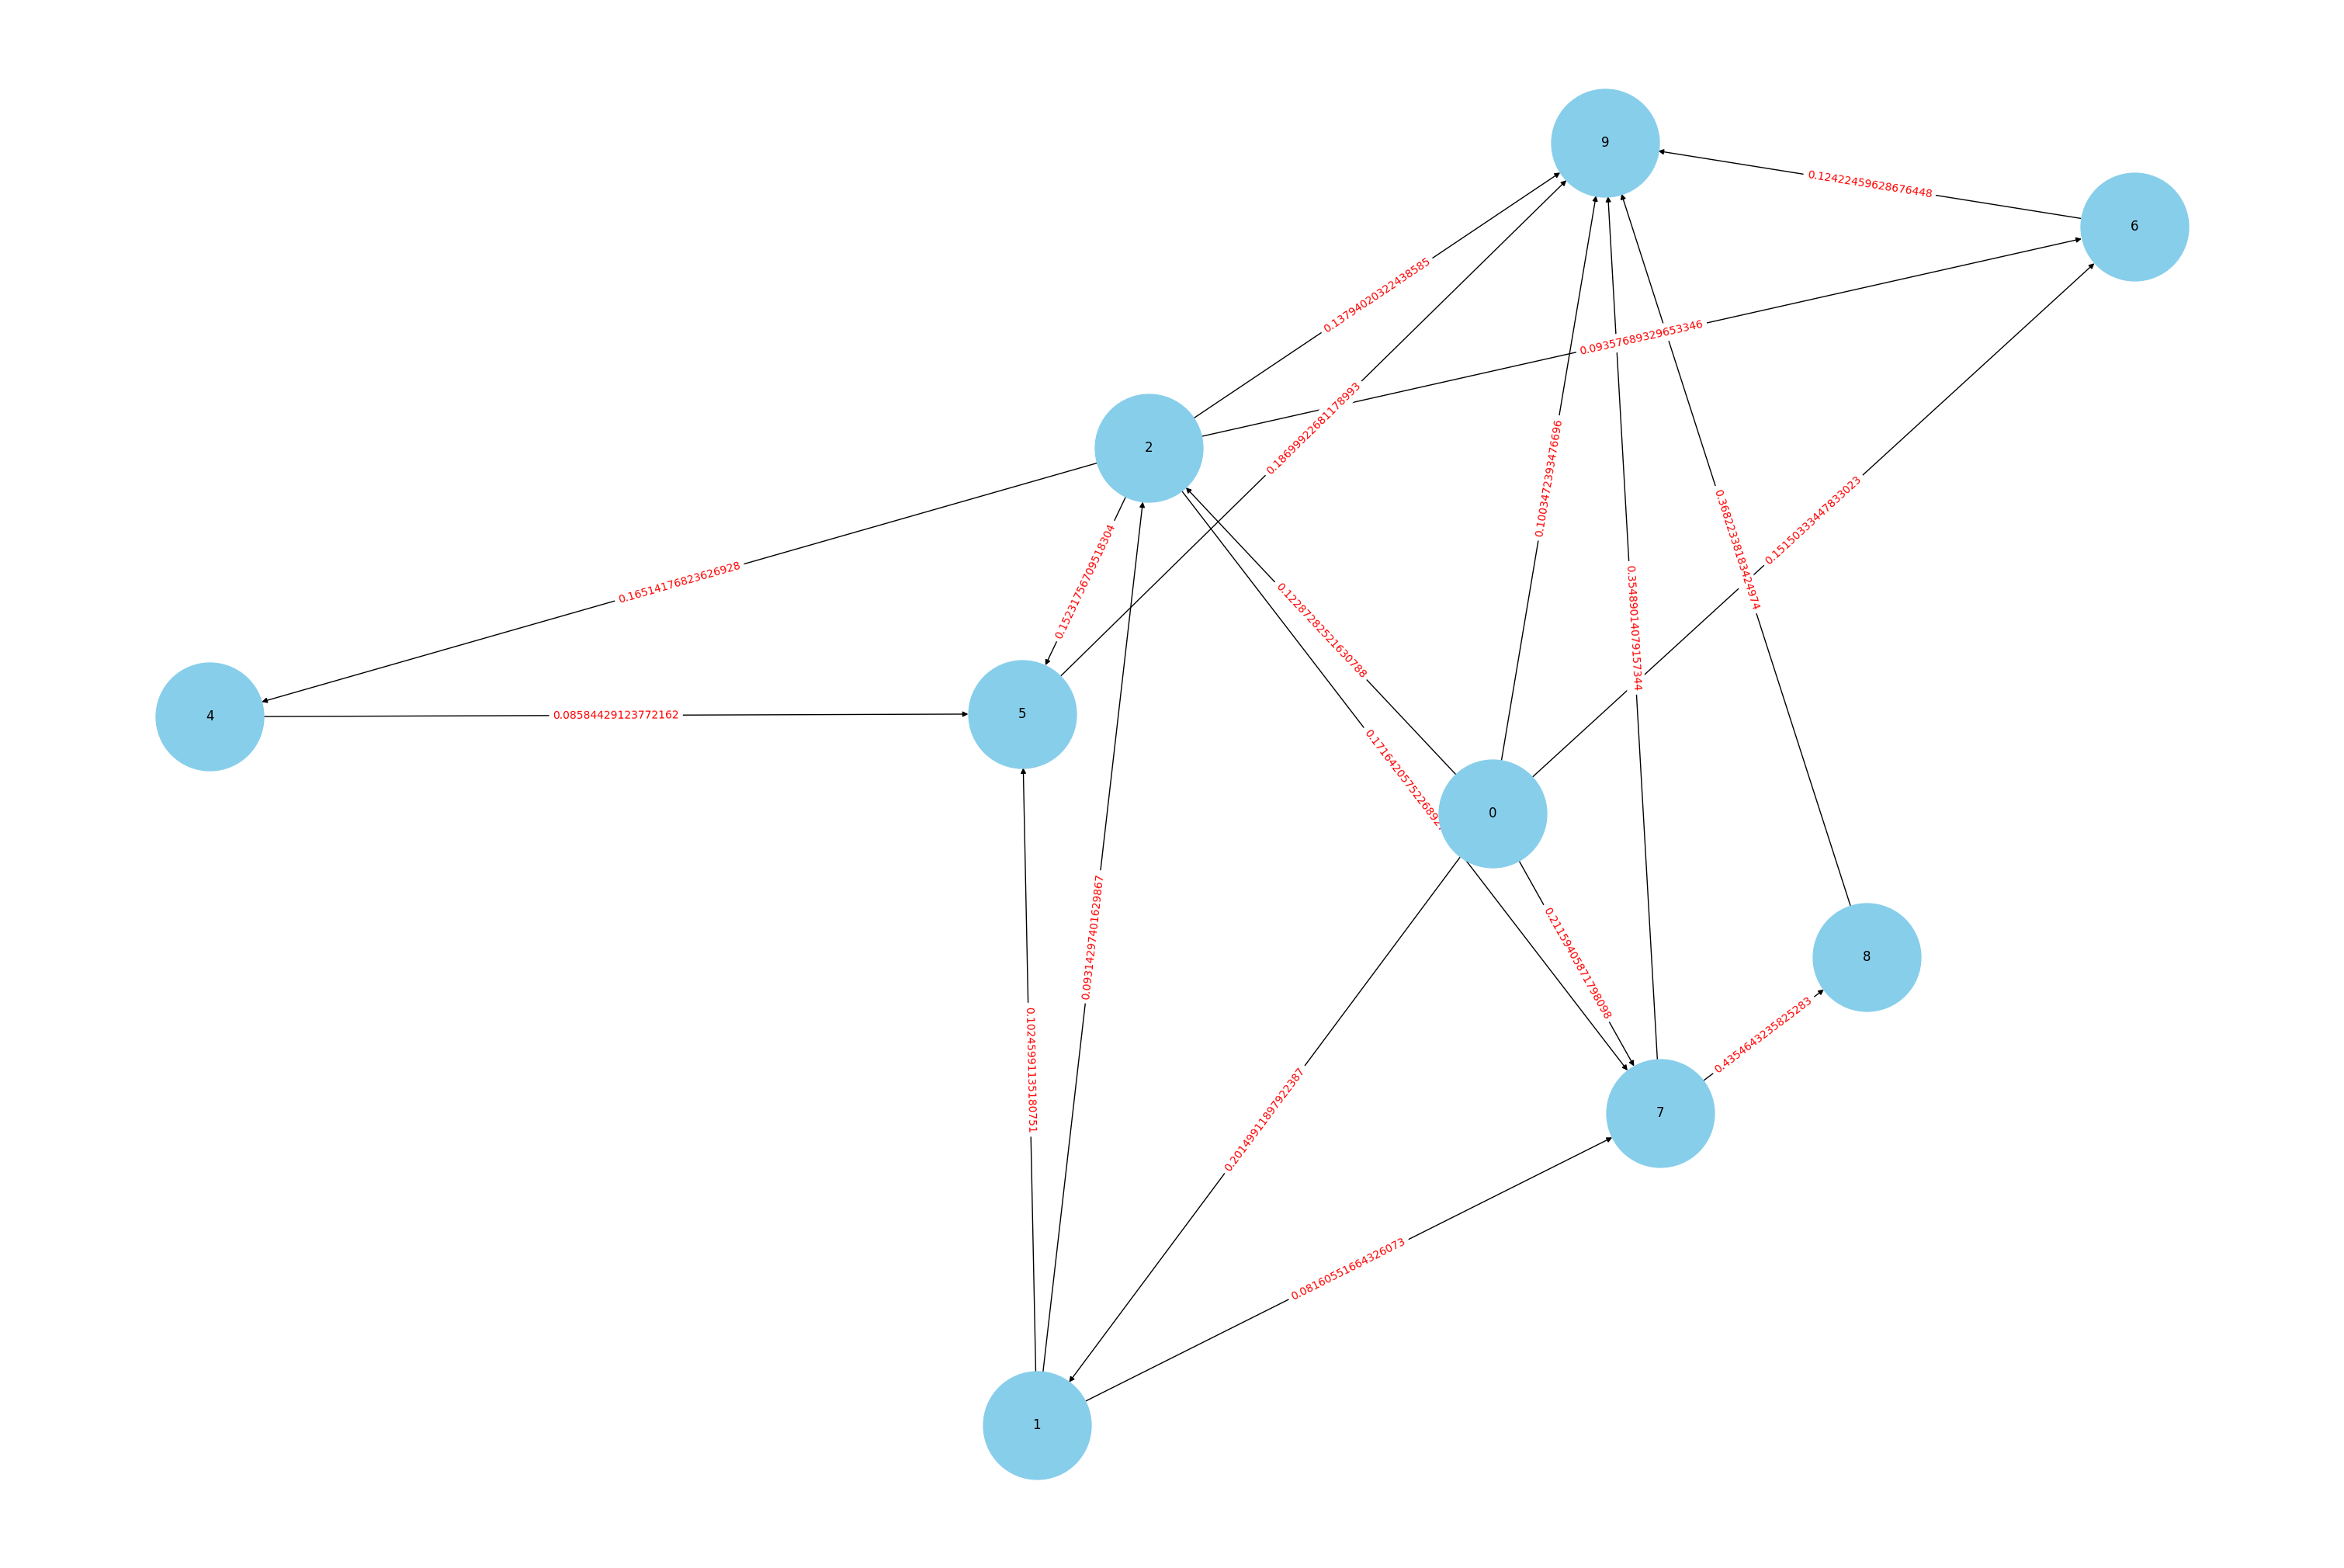

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')


In [ ]:
# for i in range(len(graf_result)):
#   cc = nx.closeness_centrality(graf_result[i])
#   print(f'====== dokumen {i} ==========')
#   print(cc)
#   print('\n')
#   # for j in range

## 7.Summary  
> Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.

In [ ]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(data['tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [ ]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = "".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [ ]:
summary_result[0]

'sebelumnya dalam rapat tersebut, jimly menjelaskan bahwa sidang pemeriksaan hakim konstitusi digelar secara tertutup sesuai peraturan internal mk dan juga untuk menjaga kehormatan hakim.kita harus tetap menjaga kehormatan sembilan hakim.maka, ini aturan ini tertutup karena kita harus menjaga haknya para hakim untuk tidak dikuyokuyodizalimidi depan umum, itu justru akan merusak citra institusi, katanya.pewarta rivan awal linggaeditor sigit pinardi    copyright  antara 2023itu tertutup karena sidang ini pada dasarnya tertutup, kata jimly ditemui usai rapat mkmk di gedung ii mk, jakarta, kamis 2610.    jimly mengatakan pihaknya sedang menyusun mekanisme pemeriksaan hakim konstitusi.senin 3010, kata dia, pihaknya akan menggelar pertemuan dengan sembilan hakim konstitusi untuk menyampaikan mekanisme pemeriksaan tersebut.jadwalnya lagi disusun, ada yang ramairamai diperiksa bersembilan, ada yang satu orang, ada yang dua orang, ada yang lima orang, sendirisendiri, tergantung kasus laporannya

In [ ]:

dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,data['Label']],axis=1)
dataSummary

,Summary,Label
0,"sebelumnya dalam rapat tersebut, jimly menjela...",politik
1,"kalau melihat rapat pertamanya, ada harapan in...",politik
2,sedangkan pasangan prabowogibran diusung oleh ...,politik
3,sedangkan pasangan prabowogibran diusung dan d...,politik
4,saya berharap knpi menjadi magnet perjuangan k...,politik
...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",olahraga
633,baca juga tim indonesia bawa keragaman budaya ...,olahraga
634,medali perak sekaligus medali pertama untuk in...,olahraga
635,"sementara itu, asian para games 2022 hangzhou ...",olahraga


In [ ]:
# data.isna().sum()

### Save data

In [ ]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Label':data['Label'][i]
  })

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'data_summary_antaranews.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Label']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

NameError: ignored

In [ ]:
  # pos = nx.spring_layout(graf_result[0])  # Menentukan posisi simpul
  # labels = nx.get_edge_attributes(graf_result[0], 'weight')

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[0], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[0], pos, edge_labels=labels, font_color='red')
  # plt.show()

# Modeling data Summary

## EDA (Explorasi Data Analysis)  
> proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.

### 1.Download dataset

Import library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import gdown

In [ ]:
# download data
nama_data = 'datasummary.csv'
gdown.download(f'https://drive.google.com/uc?id=10LSgIUgCpAwfxNNxKvtd9NuR2Djq95RQ', nama_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10LSgIUgCpAwfxNNxKvtd9NuR2Djq95RQ
To: /content/datasummary.csv
100%|██████████| 1.68M/1.68M [00:00<00:00, 146MB/s]


'datasummary.csv'

### 2.Baca dataset

In [ ]:
datasummary = pd.read_csv("datasummary.csv")
datasummary

,Summary,Label
0,"sebelumnya dalam rapat tersebut, jimly menjela...",politik
1,"kalau melihat rapat pertamanya, ada harapan in...",politik
2,sedangkan pasangan prabowogibran diusung oleh ...,politik
3,sedangkan pasangan prabowogibran diusung dan d...,politik
4,saya berharap knpi menjadi magnet perjuangan k...,politik
...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",olahraga
633,baca juga tim indonesia bawa keragaman budaya ...,olahraga
634,medali perak sekaligus medali pertama untuk in...,olahraga
635,"sementara itu, asian para games 2022 hangzhou ...",olahraga


#### Banyak dataset

In [ ]:
len(datasummary)

637

#### Banyak dataset setiap kelas

In [ ]:
count_ekonomi = 0
count_olahraga= 0
count_politik = 0

for value in datasummary['Label']:
  if value == 'ekonomi':
    count_ekonomi+=1
  elif value == 'olahraga':
    count_olahraga+=1
  else:
    count_politik += 1

print(
f'''
Banyak data ekonomi = {count_ekonomi} data
Banyak data olahraga= {count_olahraga} data
Banyak data politik = {count_politik} data

Total Data          = {len(datasummary)} data
'''
)


Banyak data ekonomi = 224 data
Banyak data olahraga= 209 data
Banyak data politik = 204 data

Total Data          = 637 data



## Preprocessing

### 1.Missing value

In [ ]:
datasummary.isna().sum()

Summary    0
Label      0
dtype: int64

### 2.Duplicate data

In [ ]:
datasummary.duplicated().sum()

0

### 3.Cleaning

#### Pucntuation

In [ ]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama new_abstrak untuk data baru yang dipunctuation
datasummary['summary_punct'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'new_abstrak'
datasummary['summary_punct'] = datasummary['summary_punct'].str.replace('\d+', '', regex=True)

<ipython-input-139-a8bdec6b604c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_punct'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


In [ ]:
datasummary

,Summary,Label,summary_punct
0,"sebelumnya dalam rapat tersebut, jimly menjela...",politik,sebelumnya dalam rapat tersebut jimly menjelas...
1,"kalau melihat rapat pertamanya, ada harapan in...",politik,kalau melihat rapat pertamanya ada harapan ini...
2,sedangkan pasangan prabowogibran diusung oleh ...,politik,sedangkan pasangan prabowogibran diusung oleh ...
3,sedangkan pasangan prabowogibran diusung dan d...,politik,sedangkan pasangan prabowogibran diusung dan d...
4,saya berharap knpi menjadi magnet perjuangan k...,politik,saya berharap knpi menjadi magnet perjuangan k...
...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",olahraga,sementara itu kontingen indonesia hingga kini ...
633,baca juga tim indonesia bawa keragaman budaya ...,olahraga,baca juga tim indonesia bawa keragaman budaya ...
634,medali perak sekaligus medali pertama untuk in...,olahraga,medali perak sekaligus medali pertama untuk in...
635,"sementara itu, asian para games 2022 hangzhou ...",olahraga,sementara itu asian para games hangzhou masih...


#### **Stopword**

> Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

In [ ]:
datasummary

,Summary,Label,summary_punct,summary_stopwords
0,"sebelumnya dalam rapat tersebut, jimly menjela...",politik,sebelumnya dalam rapat tersebut jimly menjelas...,sebelumnya dalam rapat tersebut jimly bahwa s...
1,"kalau melihat rapat pertamanya, ada harapan in...",politik,kalau melihat rapat pertamanya ada harapan ini...,kalau melihat rapat pertamanya ada harapan ini...
2,sedangkan pasangan prabowogibran diusung oleh ...,politik,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...
3,sedangkan pasangan prabowogibran diusung dan d...,politik,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...
4,saya berharap knpi menjadi magnet perjuangan k...,politik,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...
...,...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",olahraga,sementara itu kontingen indonesia hingga kini ...,sementara itu kontingen indonesia hingga kini ...
633,baca juga tim indonesia bawa keragaman budaya ...,olahraga,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...
634,medali perak sekaligus medali pertama untuk in...,olahraga,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...
635,"sementara itu, asian para games 2022 hangzhou ...",olahraga,sementara itu asian para games hangzhou masih...,sementara itu asian para games hangzhou masih...


#### Tokenizing



> **Tokenizing** adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.



In [ ]:
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)

In [ ]:
datasummary

,Summary,Label,summary_punct,summary_stopwords,summary_tokens
0,"sebelumnya dalam rapat tersebut, jimly menjela...",politik,sebelumnya dalam rapat tersebut jimly menjelas...,sebelumnya dalam rapat tersebut jimly bahwa s...,"[sebelumnya, dalam, rapat, tersebut, jimly, ba..."
1,"kalau melihat rapat pertamanya, ada harapan in...",politik,kalau melihat rapat pertamanya ada harapan ini...,kalau melihat rapat pertamanya ada harapan ini...,"[kalau, melihat, rapat, pertamanya, ada, harap..."
2,sedangkan pasangan prabowogibran diusung oleh ...,politik,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...,"[sedangkan, pasangan, prabowogibran, diusung, ..."
3,sedangkan pasangan prabowogibran diusung dan d...,politik,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...,"[sedangkan, pasangan, prabowogibran, diusung, ..."
4,saya berharap knpi menjadi magnet perjuangan k...,politik,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...,"[saya, berharap, knpi, menjadi, magnet, perjua..."
...,...,...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",olahraga,sementara itu kontingen indonesia hingga kini ...,sementara itu kontingen indonesia hingga kini ...,"[sementara, itu, kontingen, indonesia, hingga,..."
633,baca juga tim indonesia bawa keragaman budaya ...,olahraga,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...,"[baca, juga, tim, indonesia, bawa, keragaman, ..."
634,medali perak sekaligus medali pertama untuk in...,olahraga,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...,"[medali, perak, sekaligus, medali, pertama, un..."
635,"sementara itu, asian para games 2022 hangzhou ...",olahraga,sementara itu asian para games hangzhou masih...,sementara itu asian para games hangzhou masih...,"[sementara, itu, asian, para, games, hangzhou,..."


In [ ]:
#merubah posisi kolom

datasummary = datasummary[['Summary', 'summary_punct', 'summary_stopwords',
            'summary_tokens','Label']]
datasummary

,Summary,summary_punct,summary_stopwords,summary_tokens,Label
0,"sebelumnya dalam rapat tersebut, jimly menjela...",sebelumnya dalam rapat tersebut jimly menjelas...,sebelumnya dalam rapat tersebut jimly bahwa s...,"[sebelumnya, dalam, rapat, tersebut, jimly, ba...",politik
1,"kalau melihat rapat pertamanya, ada harapan in...",kalau melihat rapat pertamanya ada harapan ini...,kalau melihat rapat pertamanya ada harapan ini...,"[kalau, melihat, rapat, pertamanya, ada, harap...",politik
2,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...,"[sedangkan, pasangan, prabowogibran, diusung, ...",politik
3,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...,"[sedangkan, pasangan, prabowogibran, diusung, ...",politik
4,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...,"[saya, berharap, knpi, menjadi, magnet, perjua...",politik
...,...,...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",sementara itu kontingen indonesia hingga kini ...,sementara itu kontingen indonesia hingga kini ...,"[sementara, itu, kontingen, indonesia, hingga,...",olahraga
633,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...,"[baca, juga, tim, indonesia, bawa, keragaman, ...",olahraga
634,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...,"[medali, perak, sekaligus, medali, pertama, un...",olahraga
635,"sementara itu, asian para games 2022 hangzhou ...",sementara itu asian para games hangzhou masih...,sementara itu asian para games hangzhou masih...,"[sementara, itu, asian, para, games, hangzhou,...",olahraga


#### Merge



> merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh



In [ ]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-195-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


### 4.VSM  
> VSM adalah singkatan dari "Vector Space Model" atau dalam bahasa Indonesia dapat diartikan sebagai "Model Ruang Vektor". Ini adalah sebuah pendekatan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) yang digunakan untuk merepresentasikan teks dalam bentuk vektor dalam ruang multidimensi.

#### TFIDF  
> metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [ ]:
datasummary

,Summary,summary_punct,summary_stopwords,summary_tokens,Label,summary_final
0,"sebelumnya dalam rapat tersebut, jimly menjela...",sebelumnya dalam rapat tersebut jimly menjelas...,sebelumnya dalam rapat tersebut jimly bahwa s...,"[sebelumnya, dalam, rapat, tersebut, jimly, ba...",politik,sebelumnya dalam rapat tersebut jimly bahwa si...
1,"kalau melihat rapat pertamanya, ada harapan in...",kalau melihat rapat pertamanya ada harapan ini...,kalau melihat rapat pertamanya ada harapan ini...,"[kalau, melihat, rapat, pertamanya, ada, harap...",politik,kalau melihat rapat pertamanya ada harapan ini...
2,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...,sedangkan pasangan prabowogibran diusung oleh ...,"[sedangkan, pasangan, prabowogibran, diusung, ...",politik,sedangkan pasangan prabowogibran diusung oleh ...
3,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...,sedangkan pasangan prabowogibran diusung dan d...,"[sedangkan, pasangan, prabowogibran, diusung, ...",politik,sedangkan pasangan prabowogibran diusung dan d...
4,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...,saya berharap knpi menjadi magnet perjuangan k...,"[saya, berharap, knpi, menjadi, magnet, perjua...",politik,saya berharap knpi menjadi magnet perjuangan k...
...,...,...,...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",sementara itu kontingen indonesia hingga kini ...,sementara itu kontingen indonesia hingga kini ...,"[sementara, itu, kontingen, indonesia, hingga,...",olahraga,sementara itu kontingen indonesia hingga kini ...
633,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...,baca juga tim indonesia bawa keragaman budaya ...,"[baca, juga, tim, indonesia, bawa, keragaman, ...",olahraga,baca juga tim indonesia bawa keragaman budaya ...
634,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...,medali perak sekaligus medali pertama untuk in...,"[medali, perak, sekaligus, medali, pertama, un...",olahraga,medali perak sekaligus medali pertama untuk in...
635,"sementara itu, asian para games 2022 hangzhou ...",sementara itu asian para games hangzhou masih...,sementara itu asian para games hangzhou masih...,"[sementara, itu, asian, para, games, hangzhou,...",olahraga,sementara itu asian para games hangzhou masih ...


In [ ]:
datasummary['summary_final'][0]

'sebelumnya dalam rapat tersebut jimly bahwa sidang pemeriksaan hakim konstitusi digelar secara tertutup sesuai peraturan internal mk dan juga untuk menjaga kehormatan hakim kita harus tetap menjaga kehormatan sembilan hakim maka ini aturan ini tertutup karena kita harus menjaga haknya para hakim untuk tidak dikuyokuyodizalimidi depan umum itu justru akan merusak citra institusi katanyapewarta rivan awal linggaeditor sigit pinardi copyright antara itu tertutup karena sidang ini pada dasarnya tertutup kata jimly ditemui usai rapat mkmk di gedung ii mk jakarta kamis jimly mengatakan pihaknya sedang menyusun mekanisme pemeriksaan hakim konstitusi senin kata dia pihaknya akan menggelar pertemuan dengan sembilan hakim konstitusi untuk menyampaikan mekanisme pemeriksaan tersebut jadwalnya lagi disusun ada yang ramairamai diperiksa bersembilan ada yang satu orang ada yang dua orang ada yang lima orang sendirisendiri tergantung kasus laporannya papar jimly atas dasar prinsipprinsip hukum dan k

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
summ_tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
summ_tfidf_matrix = summ_tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
summ_tfidf_df = pd.DataFrame(summ_tfidf_matrix.toarray(),columns=summ_tfidf_vectorizer.get_feature_names_out())
summ_tfidf_df = pd.concat([datasummary['Summary'],summ_tfidf_df,datasummary['Label']],axis=1)
# Cetak DataFrame TF-IDF
summ_tfidf_df

,Summary,aa,aac,aamiin,aaron,aaronsoh,abad,abadi,abai,abang,...,zulfira,zulkifli,zulkilfi,zumba,zumrotun,zuni,zuxian,zuxianyang,zverev,Label
0,"sebelumnya dalam rapat tersebut, jimly menjela...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,politik
1,"kalau melihat rapat pertamanya, ada harapan in...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,politik
2,sedangkan pasangan prabowogibran diusung oleh ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,politik
3,sedangkan pasangan prabowogibran diusung dan d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,politik
4,saya berharap knpi menjadi magnet perjuangan k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,politik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,"sementara itu, kontingen indonesia hingga kini...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,olahraga
633,baca juga tim indonesia bawa keragaman budaya ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,olahraga
634,medali perak sekaligus medali pertama untuk in...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,olahraga
635,"sementara itu, asian para games 2022 hangzhou ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,olahraga


In [ ]:
# summ_tfidf_df.iloc[:,1:-1]

### 5.Modeling

#### Split dataset

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = summ_tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = summ_tfidf_df["Label"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)


#### Naive Bayes

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_tfidf_train, y_tfidf_train)

y_pred = naive_bayes.predict(X_tfidf_test)

accuracy_naiveBayes = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.953125


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.953125


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.9453125


### 6.Evaluasi

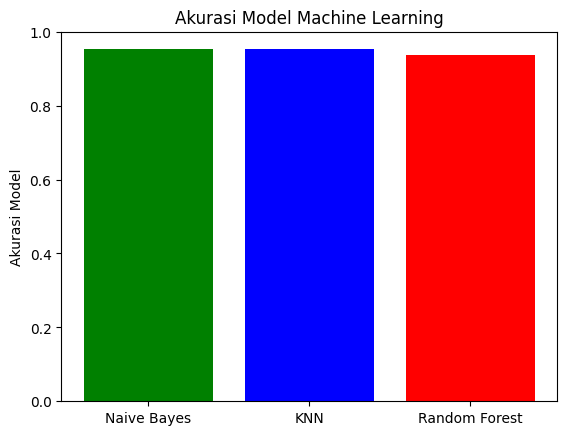

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()

### 7.Implementasi

In [ ]:
# ========== data inputan ==========
new_data = str(input("masukkan data: "))
# tokenizing kalimat
new_data = sent_tokenize(new_data)
# new_data

# ========== vectorize ==========
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
inp_tfidf_vectorizer = TfidfVectorizer()
# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
inp_tfidf_matrix = inp_tfidf_vectorizer.fit_transform(new_data)
# inp_tfidf_matrix.toarray()



masukkan data: Jakarta - Makna motif adalah alasan atau penyebab seseorang melakukan sesuatu. Ketika kita melakukan suatu tindakan pasti ada sesuatu hal yang mendorongnya. Contohnya kita makan karena kita lapar. Hal tersebut juga terjadi pada kegiatan ekonomi. Semua kegiatan ekonomi tidak dapat terjadi begitu saja, namun terdapat suatu alasan atau penyebab yang mendorongnya. Faktor pendorong inilah yang disebut motif ekonomi.  Baca artikel detikfinance, "Pengertian Motif Ekonomi serta Tujuan, Sifat, Macam, dan Contohnya" selengkapnya https://finance.detik.com/berita-ekonomi-bisnis/d-7048370/pengertian-motif-ekonomi-serta-tujuan-sifat-macam-dan-contohnya.  Download Apps Detikcom Sekarang https://apps.detik.com/detik/


In [ ]:
len(inp_tfidf_matrix.toarray())

8

In [ ]:
# ========== cosine ==========
inp_cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
# graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

# cos_sim_now = []
inp_graf = nx.DiGraph()
inp_cos_sim = cosine_similarity(inp_tfidf_matrix) #menjadikan tfidf ke cosine
# len(inp_cos_sim)
for i_hasil in range(len(inp_cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine

  for j_hasil in range(i_hasil+1,len(inp_cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
    # if inp_cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
      # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {inp_cos_sim[i_hasil][j_hasil]}')

      inp_cos_sim_result.append([i_hasil,j_hasil,inp_cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
      inp_graf.add_edge(i_hasil,j_hasil,weight=inp_cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim


In [ ]:
inp_cos_sim_result

[[0, 1, 0.16765698165146564],
 [0, 2, 0.0],
 [0, 3, 0.0],
 [0, 4, 0.20743849998921207],
 [0, 5, 0.0790490636727853],
 [0, 6, 0.056520358292053124],
 [0, 7, 0.0],
 [1, 2, 0.18623374953689192],
 [1, 3, 0.10123665968654692],
 [1, 4, 0.18199258843982852],
 [1, 5, 0.075805188202755],
 [1, 6, 0.0],
 [1, 7, 0.0],
 [2, 3, 0.0],
 [2, 4, 0.0],
 [2, 5, 0.0],
 [2, 6, 0.08431457263204732],
 [2, 7, 0.0],
 [3, 4, 0.21481137527927924],
 [3, 5, 0.0733877815688963],
 [3, 6, 0.07870878254237265],
 [3, 7, 0.0],
 [4, 5, 0.11059614601939452],
 [4, 6, 0.05155320814413656],
 [4, 7, 0.0],
 [5, 6, 0.14778833097788927],
 [5, 7, 0.0],
 [6, 7, 0.12849923433470256]]

In [ ]:
#  ============= Closeness ==========
# Cuma cek Hitung closeness centrality pada index 0
inp_closeness_centrality = nx.closeness_centrality(inp_graf)
inp_closeness_centrality

{0: 0.0,
 1: 0.14285714285714285,
 2: 0.2857142857142857,
 3: 0.42857142857142855,
 4: 0.5714285714285714,
 5: 0.7142857142857143,
 6: 0.8571428571428571,
 7: 1.0}

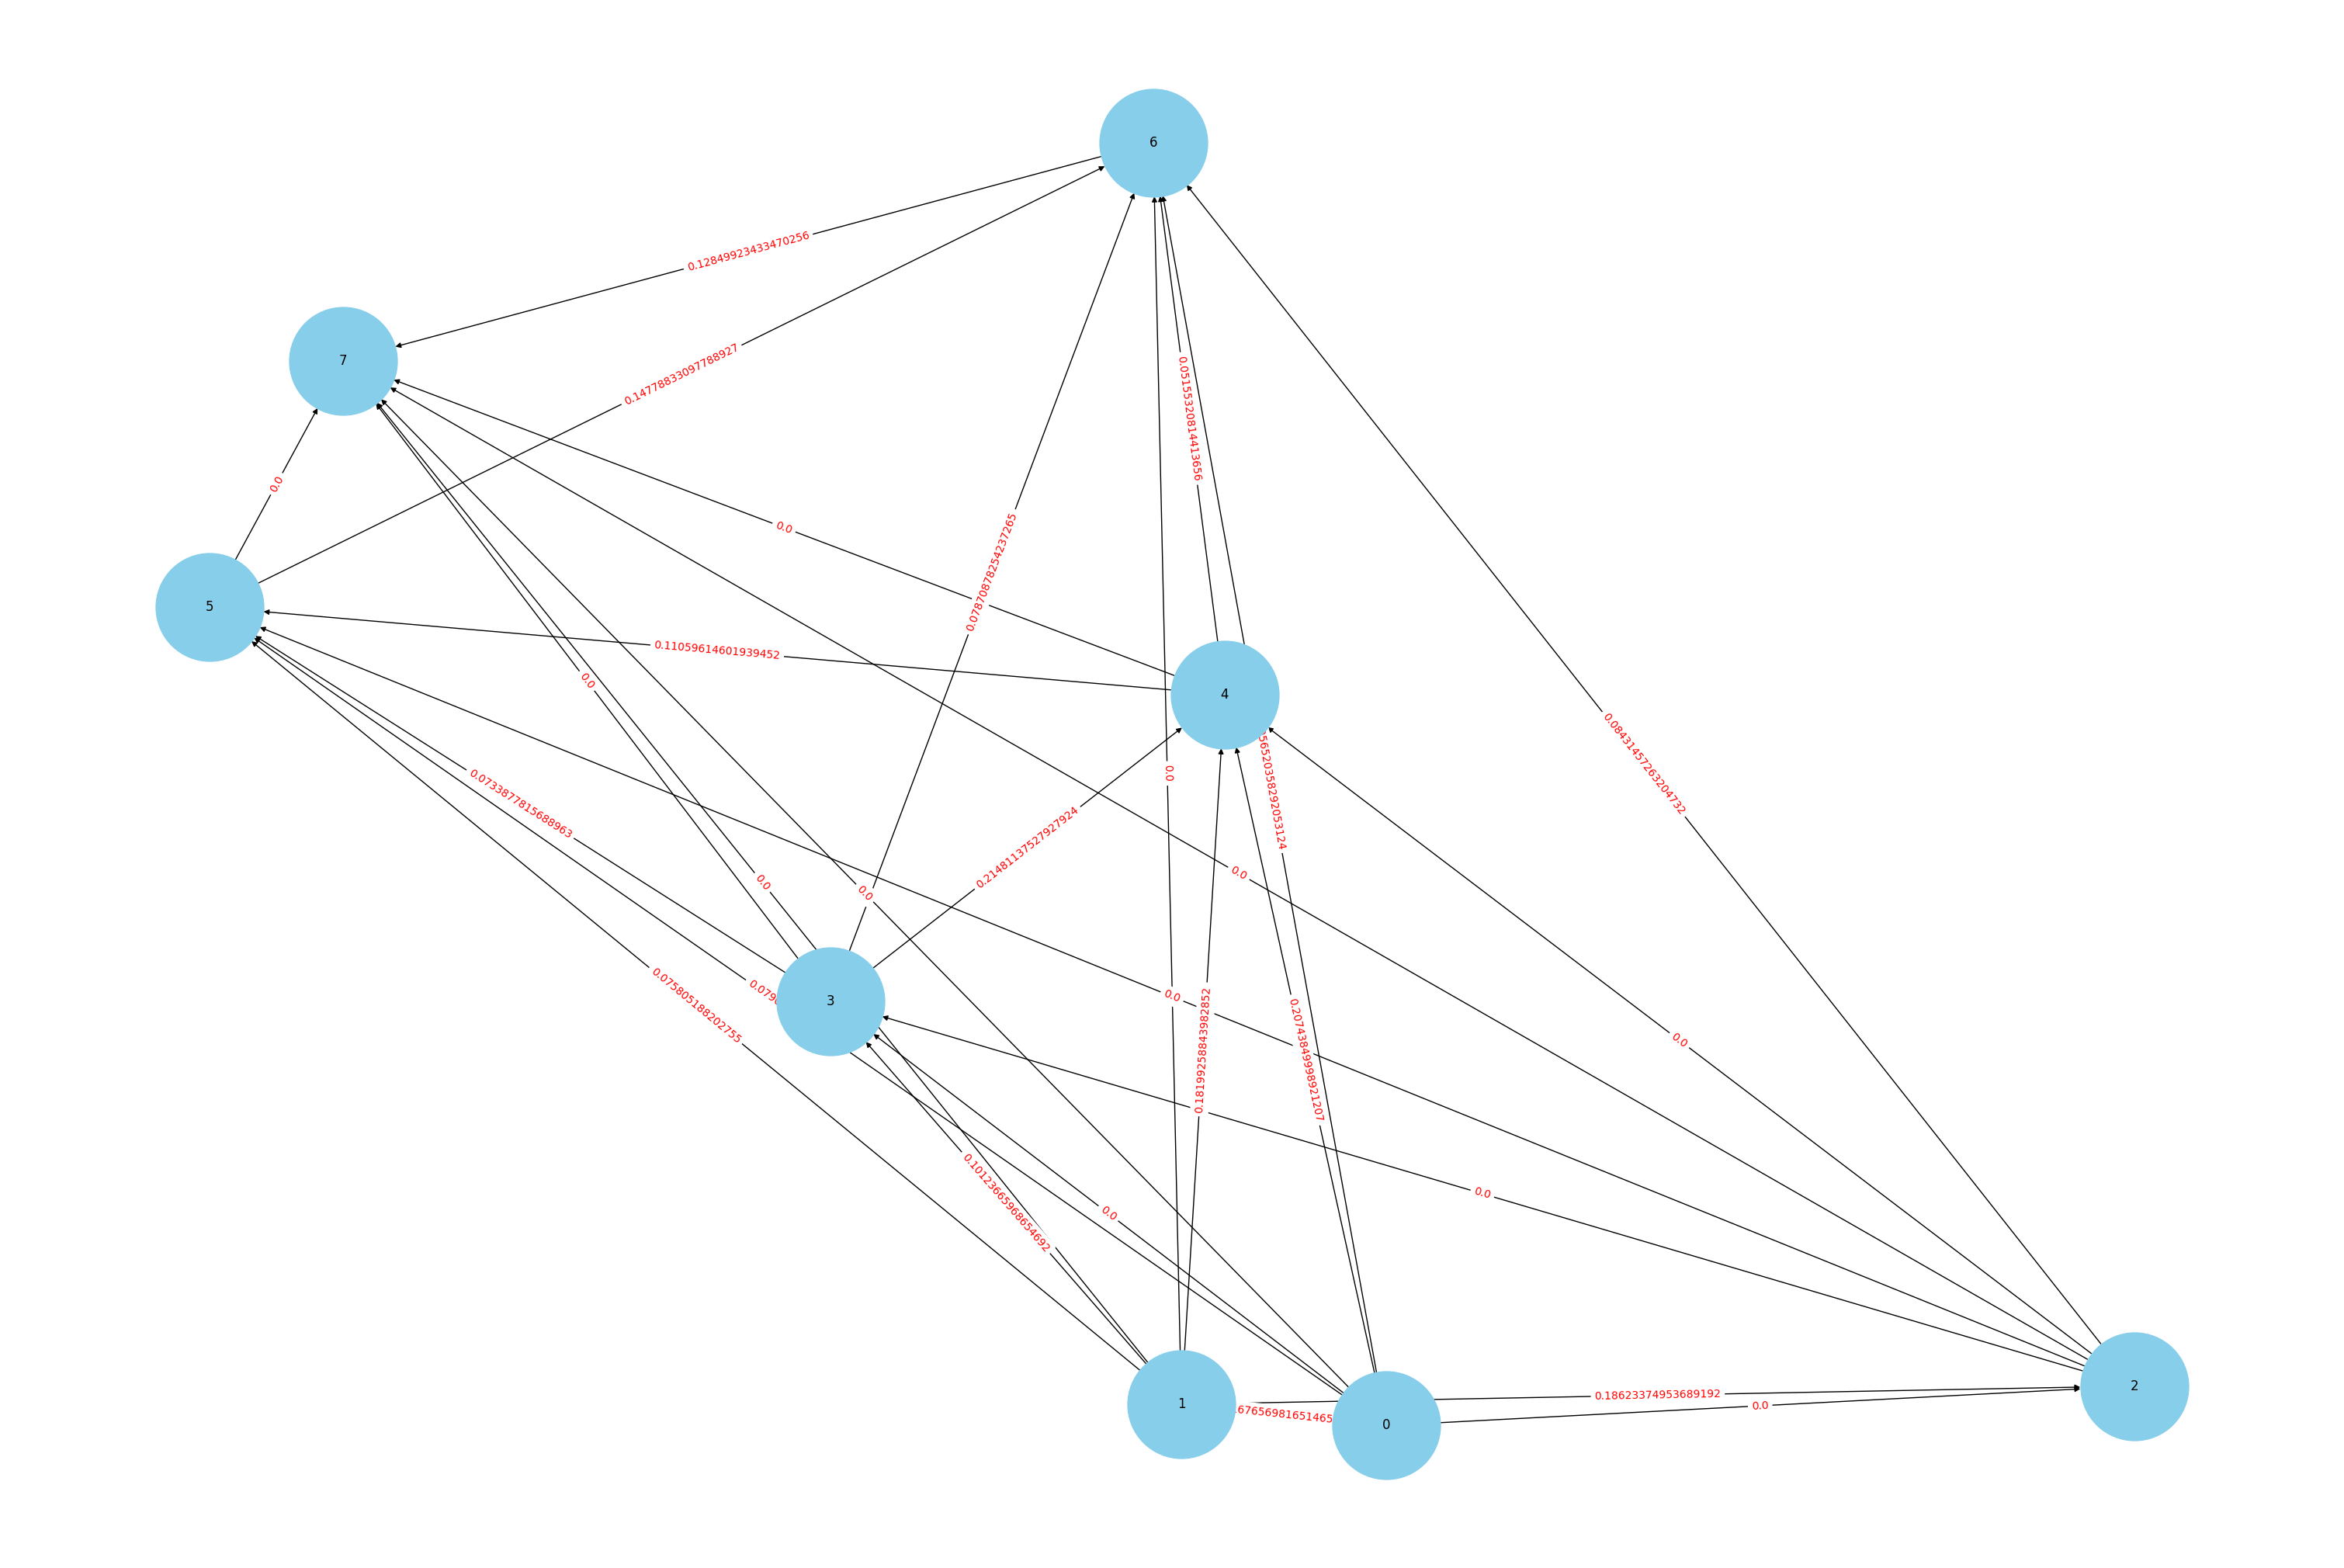

In [ ]:
# ========= menampilkan graf ===========

pos = nx.spring_layout(inp_graf)  ## Menentukan posisi/koordinat simpul
labels = nx.get_edge_attributes(inp_graf, 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

# Menentukan ukuran canvas
plt.figure(figsize=(30, 20))

# Menggambar graf dengan ukuran canvas yang diperbesar
nx.draw(inp_graf, pos, with_labels=True, node_size=10000, node_color='skyblue')
nx.draw_networkx_edge_labels(inp_graf, pos, edge_labels=labels, font_color='red')
plt.show()

In [ ]:
# ========== inp_summary =========
inp_summary = [] #membuat array kosong untuk hasil inp_summary
# for i in range(len(graf_result)): #perulangan setiap graf result

inp_cc = nx.closeness_centrality(inp_graf) #menjadikan closeness centrality pada setiap indeks graf result
inp_cc = dict(sorted(inp_cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

inp_list = list(inp_cc.keys())[:3] #mengambil indeks 3 kalimat teratas
# print(inp_cc)
# print(inp_list)
# current_summary = [] #menyimpan hasil inp_summary sementara

for key,value in inp_cc.items():
  # print((data['tokenizing'][i][key]))
  inp_summary.append(new_data[key]) #menambahkan hasil inp_summary setiap kalimat
# inp_summary.append(current_summary) #menambahkan hasil inp_summary setiap dokumen


In [ ]:
inp_summary

['Download Apps Detikcom Sekarang https://apps.detik.com/detik/',
 'Baca artikel detikfinance, "Pengertian Motif Ekonomi serta Tujuan, Sifat, Macam, dan Contohnya" selengkapnya https://finance.detik.com/berita-ekonomi-bisnis/d-7048370/pengertian-motif-ekonomi-serta-tujuan-sifat-macam-dan-contohnya.',
 'Faktor pendorong inilah yang disebut motif ekonomi.',
 'Semua kegiatan ekonomi tidak dapat terjadi begitu saja, namun terdapat suatu alasan atau penyebab yang mendorongnya.',
 'Hal tersebut juga terjadi pada kegiatan ekonomi.',
 'Contohnya kita makan karena kita lapar.',
 'Ketika kita melakukan suatu tindakan pasti ada sesuatu hal yang mendorongnya.',
 'Jakarta - Makna motif adalah alasan atau penyebab seseorang melakukan sesuatu.']

In [ ]:


inp_summ_hasil = "".join(inp_summary)  # Joining each sentence in the summary
# inp_summary_result.append(inp_summ_hasil)  # Adding it to the final inp_summary_result

# Display the inp_summary_result
print(inp_summ_hasil)

pertandingan semifinal dan final akan dimainkan di sydney, dan terdapat uang hadiah prize money senilai 15 juta dolar serta poin untuk peringkat atp dan wta.borna coric dan donna vekic akan memimpin kroasia melawan belanda dan norwegia.baca juga petenis veteran gael monfils menangi gelar atp ke12nya di stockholm   masingmasing tim yang terdiri dari tiga petenis putra dan tiga petenis putri akan memainkan turnamen dengan format round robin.kanada akan diperkuat oleh felix augeraliassime dan leylah fernandez.para juara grup di tiaptiap kota akan melaju ke perempat final, bersama satu tim peringkat kedua terbaik.baca juga hurkacz taklukkan rublev untuk menangi shanghai masters  baca juga pegula raih gelar kedua musim ini usai juarai wta korean openpewarta a rauf andar adipatieditor eka arifa rusqiyati    copyright  antara 2023juara grand slam angelique kerber juga akan tampil di sydney untuk melakukan penampilan perdananya setelah sempat absen bermain karena melahirkan.juara bertahan as, 

In [ ]:
inp_summ_hasil

'pertandingan semifinal dan final akan dimainkan di sydney, dan terdapat uang hadiah prize money senilai 15 juta dolar serta poin untuk peringkat atp dan wta.borna coric dan donna vekic akan memimpin kroasia melawan belanda dan norwegia.baca juga petenis veteran gael monfils menangi gelar atp ke12nya di stockholm   masingmasing tim yang terdiri dari tiga petenis putra dan tiga petenis putri akan memainkan turnamen dengan format round robin.kanada akan diperkuat oleh felix augeraliassime dan leylah fernandez.para juara grup di tiaptiap kota akan melaju ke perempat final, bersama satu tim peringkat kedua terbaik.baca juga hurkacz taklukkan rublev untuk menangi shanghai masters  baca juga pegula raih gelar kedua musim ini usai juarai wta korean openpewarta a rauf andar adipatieditor eka arifa rusqiyati    copyright  antara 2023juara grand slam angelique kerber juga akan tampil di sydney untuk melakukan penampilan perdananya setelah sempat absen bermain karena melahirkan.juara bertahan as,

In [ ]:
# Membuat inp_summ_hasil menjadi list jika belum
if not isinstance(inp_summ_hasil, list):
    inp_summ_hasil = [inp_summ_hasil]

# Melakukan transformasi TF-IDF pada inp_summ_hasil
summ_inp_tfidf_matrix = summ_tfidf_vectorizer.transform(inp_summ_hasil)
# summ_inp_tfidf_matrix.toarray()


In [ ]:
summ_inp_tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07616277]])

In [ ]:
# === predict ====

inp_predict = knn.predict(summ_inp_tfidf_matrix.toarray())
inp_predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['olahraga'], dtype=object)

ini cuma coba biar paham :(

In [ ]:
# # ======================= ini coba penjelasan =============

# from sklearn.feature_extraction.text import TfidfVectorizer

# # Inisialisasi TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()

# datacoba = [
#     ['apakah saya akan.',
#     'namun tidak tahu',
#     'sudah si coba doang'],
#     [
#         'ya benar',
#         'sudah'
#     ]
# ]

# # Looping untuk mengakses setiap dokumen
# for i in range(len(datacoba)):
#     tfidf_matrix = tfidf_vectorizer.fit_transform(datacoba[i])
#     print(f"\n========= Dokumen ke-{i+1}: ================")
#     # Output TF-IDF untuk setiap kata yang muncul dalam kalimat
#     feature_names = tfidf_vectorizer.get_feature_names_out()
#     # print('ini term-:\n',feature_names)
#     dense = tfidf_matrix.toarray()
#     # print('\nini matriks:\n',dense)
#     denselist = dense.tolist()
#     # print('\nmatriks jadi list:\n',denselist)

#     # Menampilkan hasil TF-IDF untuk setiap dokumen

#     for index in range(len(denselist)):
#         print(f"Kalimat {index + 1}:")
#         for word_index in range(len(denselist[index])):
#             score = denselist[index][word_index]
#             print(f'term ke-{word_index+1}: {feature_names[word_index]} =tfidf : {round(score, 3)}')
#         print(f'denselist - {denselist[i]}')
#         print("\n")
